# Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Column Profiling

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates  cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Concept Tested

* Ensemble Learning- Bagging
* Ensemble Learning- Boosting
* KNN Imputation of Missing Values
* Working with an imbalanced dataset


### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
 accuracy_score, confusion_matrix, classification_report,
 roc_auc_score, roc_curve, auc,
 plot_confusion_matrix, plot_roc_curve
)

**Loading Data into DataFrame**

In [6]:
company_data = pd.read_csv("ola.csv")

**Dropping the unnamed:0 column**

In [7]:
company_data = company_data.drop(['Unnamed: 0'],axis=1)

In [8]:
company_data = company_data['Gender'].astype("str")
company_data = company_data['Education_Level'].astype("str")

KeyError: 'Education_Level'

In [5]:
company_data

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


**Insight -**
   * We have 19104 data points, and 13 features.

**Identification of variables and data types**

company_data.shape

In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [7]:
def feature_names(df):
    
    print(f"Columns with category datatypes (Categorical Features) are : \
    {list(df.select_dtypes('object').columns)}")
    print('-'*125)
    print('-'*125)
    print(f"Columns with integer and float datatypes (Numerical Features) are: \
    {list(df.select_dtypes(['int64','float64']).columns)}")

In [8]:
feature_names(company_data)

Columns with category datatypes (Categorical Features) are :     ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


**Analysing the basic metrics:**

In [9]:
company_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [1]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.7.1-py3-none-win_amd64.whl (89.1 MB)


In [2]:
from xgboost import XGBClassifier

In [10]:
company_data.describe(include = [object]).transpose()

,count,unique,top,freq
MMM-YY,19104,24,01/01/19,1022
City,19104,29,C20,1008
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


# Missing Values

In [11]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [13]:
missing_df = missingValue(company_data)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  19104 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,17488,91.54
Age,61,0.32
Gender,52,0.27


**Insights -**
   * As we can see, 91.54 % data for LastWorkingDate is missing. Now, we need to know that in order to predict if the employee will leave the company or not can be best predicted if we have last working day info available and hence although the missing percentage is high, it's not because of Null values but the employees are not planning to leave the company and hence have not provided the info.Therefore we should not remove this feature from our data, instead we need to treat this as our target variable.  

In [14]:
# Creating a copy of original data before proceeding further:
company_data_1 = company_data.copy()

# Feature Engineering to prepare the data for actual analysis:

In [15]:
company_data['Driver_ID'].unique()

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

**Insights -**
   * Total 2788 unique Driver_ID

In [16]:
company_data['Driver_ID'].nunique()

2381

**Insights -**
*   Total 2381 rows for unique employee id's and hence (2381 - 2788 ) = -407 employee ids are either repeated or not present. We will check this...

**Feature creation : quarterly_performance**

**Creating a column (quarterly_performance) which tells whether the quarterly rating has increased for that employee**
*   for those whose quarterly rating has increased we assign the value 1

In [17]:
temp_rating = company_data[['Driver_ID','Quarterly Rating']].groupby('Driver_ID').first().reset_index()

In [18]:
temp_rating['Quarterly_Rating_first'] = temp_rating['Quarterly Rating']
temp_rating['Quarterly_Rating_last'] =  company_data[['Driver_ID','Quarterly Rating']].groupby('Driver_ID').last().reset_index()['Quarterly Rating']
temp_rating['quarterly_performance'] = np.where(temp_rating['Quarterly_Rating_last'] - temp_rating['Quarterly_Rating_first'] > 0, 1,0)
temp_rating

,Driver_ID,Quarterly Rating,Quarterly_Rating_first,Quarterly_Rating_last,quarterly_performance
0,1,2,2,2,0
1,2,1,1,1,0
2,4,1,1,1,0
3,5,1,1,1,0
4,6,1,1,2,1
...,...,...,...,...,...
2376,2784,3,3,4,1
2377,2785,1,1,1,0
2378,2786,2,2,1,0
2379,2787,2,2,1,0


In [19]:
temp_rating.drop(['Quarterly Rating','Quarterly_Rating_first','Quarterly_Rating_last'], axis= 1, inplace = True)
temp_rating

,Driver_ID,quarterly_performance
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,1
2377,2785,0
2378,2786,0
2379,2787,0


**Feature creation : income_increment**

**Creating a column (income_increment) which tells whether the monthly income has increased for that employee**

*   for those whose monthly income has increased we assign the value 1

In [20]:
temp_income = company_data[['Driver_ID','Income']].groupby('Driver_ID').first().reset_index()
temp_income['last'] = company_data[['Driver_ID','Income']].groupby('Driver_ID').last().reset_index()['Income']
temp_income['Income_increment'] = np.where(temp_income['last'] - temp_income['Income'] > 0, 1,0)
temp_income

,Driver_ID,Income,last,Income_increment
0,1,57387,57387,0
1,2,67016,67016,0
2,4,65603,65603,0
3,5,46368,46368,0
4,6,78728,78728,0
...,...,...,...,...
2376,2784,82815,82815,0
2377,2785,12105,12105,0
2378,2786,35370,35370,0
2379,2787,69498,69498,0


In [21]:
temp_income.drop(['Income','last'], axis= 1, inplace = True)
temp_income

,Driver_ID,Income_increment
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,0
2379,2787,0


**Target variable creation:**

**Creating a column (target) which tells whether the employee has left the company.**

*   for employee whose last working day is present will have the value 1.
*   aggregatiing on last value of age for a particular drive as it will be at the end of 2020
*   mean aggregation is used on Quarterly Rating
*   sum aggregation is used on Total Business Value
*   aggregatiing on first value for all other features.

In [22]:
# Creating a dictionary named "Emp_ID_dict" so that we can apply the aggregate function on the new dataset 
# with feature engineered columns and discarding old columns and columns with  Unknown field

Driver_ID_dict = {
    'MMM-YY' :'first',
    'Driver_ID' :'first',
    'Age' :'last',
    'City' : 'first',
    'Gender' :'first',
    'Education_Level' :'first',
    'Income':'first',
    'Dateofjoining' :'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' :'first',
    'Grade' :'first',
    'Quarterly Rating' :'mean',
    'Total Business Value' :'sum'   
}

In [23]:
Driver_ID_dict_df = company_data.groupby('Driver_ID').agg(Driver_ID_dict).reset_index(drop = True)
Driver_ID_dict_df

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830


In [24]:
# Checking if we have not dropped some of the data from target feature mistankenly:

Driver_ID_dict_df['LastWorkingDate'].nunique() == company_data['LastWorkingDate'].nunique()

True

In [25]:
unique_employee_array = Driver_ID_dict_df['Driver_ID'].unique()
unique_employee_array

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [26]:
cnt = 0
Driver_IDs_not_present = []
for i in range(1,2789):
    if i not in unique_employee_array:
        Driver_IDs_not_present.append(i)
        cnt+=1
print(cnt)

407


In [27]:
unique_employee_array_org = company_data['Driver_ID'].unique()
unique_employee_array_org

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [28]:
cnt = 0
Driver_IDs_not_present_org = []
for i in range(1,2789):
    if i not in unique_employee_array_org:
        Driver_IDs_not_present_org.append(i)
        cnt+=1
print(cnt)

407


In [29]:
# To cross verify if we are getting all the same Emp_IDs before and after the feature engineering aggregation step.

Driver_IDs_not_present == Driver_IDs_not_present_org

True

In [30]:
Driver_ID_dict_df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'City', 'Gender', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Quarterly Rating', 'Total Business Value'],
      dtype='object')

In [31]:
missing_df_new = missingValue(Driver_ID_dict_df)
missing_df_new[missing_df_new['Total Missing'] > 0]

Total records in our data =  2381 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,765,32.13


In [32]:
# Target variable creation
Driver_ID_dict_df['target'] = Driver_ID_dict_df['LastWorkingDate'].apply(lambda x: 0 if x == None else 1)

In [33]:
Driver_ID_dict_df

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1


**Merging dataframes:**

Merging temp_rating and temp_income into Emp_ID_dict_df and creating final dataframe for further analysis.

In [34]:
company_df_1 = pd.merge(Driver_ID_dict_df,temp_rating ,how='inner', on = 'Driver_ID')
company_data_final = pd.merge(company_df_1,temp_income ,how='inner', on = 'Driver_ID')
company_data_final

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1,0,0
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0,0,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1,0,0
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1,0,0
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0,1,0
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1,0,0
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1,0,0
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1,0,0


# Exploratory Data Analysis:

In [35]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMM-YY                 2381 non-null   object 
 1   Driver_ID              2381 non-null   int64  
 2   Age                    2381 non-null   float64
 3   City                   2381 non-null   object 
 4   Gender                 2381 non-null   float64
 5   Education_Level        2381 non-null   int64  
 6   Income                 2381 non-null   int64  
 7   Dateofjoining          2381 non-null   object 
 8   LastWorkingDate        1616 non-null   object 
 9   Joining Designation    2381 non-null   int64  
 10  Grade                  2381 non-null   int64  
 11  Quarterly Rating       2381 non-null   float64
 12  Total Business Value   2381 non-null   int64  
 13  target                 2381 non-null   int64  
 14  quarterly_performance  2381 non-null   int32  
 15  Inco

In [36]:
feature_names(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target']


**Analysing MMM-YY**

In [37]:
company_data_final['MMM-YY'].nunique()

24

In [38]:
# Coverting to To datetime:

company_data_final['MMM-YY']=pd.to_datetime(company_data_final['MMM-YY'])
company_data_final['MMM-YY'].value_counts()

2019-01-01    1022
2019-11-01     104
2020-07-01     100
2020-08-01      94
2019-07-01      86
2020-05-01      83
2019-12-01      80
2020-12-01      78
2020-06-01      73
2020-04-01      71
2020-10-01      70
2020-09-01      66
2019-10-01      65
2019-06-01      58
2020-01-01      56
2019-09-01      55
2019-08-01      55
2020-11-01      49
2020-02-01      49
2020-03-01      36
2019-05-01      17
2019-04-01       7
2019-02-01       6
2019-03-01       1
Name: MMM-YY, dtype: int64

In [39]:
company_data_2 = company_data_final.copy()

company_data_2['reporting_year'] = company_data_2['MMM-YY'].dt.year
#2
company_data_2['reporting_month'] = company_data_2['MMM-YY'].dt.month
#3
company_data_2['reporting_day_of_week'] = company_data_2['MMM-YY'].dt.day_of_week

In [40]:
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment,reporting_year,reporting_month,reporting_day_of_week
0,2019-01-01,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1,0,0,2019,1,1
1,2020-11-01,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0,0,0,2020,11,6
2,2019-12-01,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1,0,0,2019,12,6
3,2019-01-01,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1,0,0,2019,1,1
4,2020-08-01,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0,1,0,2020,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0,1,0,2019,1,1
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1,0,0,2020,8,5
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1,0,0,2019,1,1
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1,0,0,2019,1,1


In [41]:
company_data_2['reporting_year'].value_counts()

2019    1556
2020     825
Name: reporting_year, dtype: int64

In [42]:
company_data_2['reporting_month'].value_counts()

1     1078
7      186
12     158
11     153
8      149
10     135
6      131
9      121
5      100
4       78
2       55
3       37
Name: reporting_month, dtype: int64

**Analysing Dateofjoining**

In [43]:
company_data_final['Dateofjoining'].nunique()

869

In [44]:
# Coverting company_data_final to datetime:

company_data_final['Dateofjoining']=pd.to_datetime(company_data_final['Dateofjoining'])
company_data_final['Dateofjoining'].value_counts()

2020-07-31    31
2020-09-28    30
2020-05-29    20
2019-10-31    18
2020-05-01    17
              ..
2013-10-21     1
2020-08-17     1
2018-01-26     1
2013-06-02     1
2020-08-28     1
Name: Dateofjoining, Length: 869, dtype: int64

In [45]:
# Coverting company_data_2 to datetime:

company_data_2['Dateofjoining']=pd.to_datetime(company_data_2['Dateofjoining'])

In [46]:
company_data_2 = company_data_final.copy()

#1
company_data_2['joining_year'] = company_data_2['Dateofjoining'].dt.year
#2
company_data_2['joining_month'] = company_data_2['Dateofjoining'].dt.month
#3
company_data_2['joining_day_of_week'] = company_data_2['Dateofjoining'].dt.day_of_week

**Analysing LastWorkingDate**

In [47]:
company_data_final['LastWorkingDate'].nunique()

493

In [48]:
# Coverting company_data_final to datetime:

company_data_final['LastWorkingDate']=pd.to_datetime(company_data_final['LastWorkingDate'])
company_data_final['LastWorkingDate'].value_counts()

2020-07-29    70
2019-09-22    26
2019-03-17    14
2020-11-28    13
2020-02-17    13
              ..
2019-06-16     1
2020-11-17     1
2020-12-05     1
2019-09-02     1
2020-10-28     1
Name: LastWorkingDate, Length: 493, dtype: int64

In [49]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [50]:
company_data_2 = company_data_final.copy()
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.000000,1715580,1,0,0
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.000000,0,0,0,0
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.000000,350000,1,0,0
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.000000,120360,1,0,0
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,2020-10-28,1,1,1.000000,0,1,0,0
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,2019-09-22,2,2,1.666667,2815090,1,0,0
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,2019-06-20,1,1,1.500000,977830,1,0,0


In [51]:
feature_names(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['City']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target']


**Analysing City** 

In [52]:
company_data_final['City'].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

**Analysing Driver_ID**

In [53]:
company_data_final['Driver_ID'].value_counts()

1       1
1859    1
1861    1
1862    1
1863    1
       ..
933     1
935     1
936     1
937     1
2788    1
Name: Driver_ID, Length: 2381, dtype: int64

In [54]:
company_data['Driver_ID'].nunique()

2381

**Analysing Age**

In [55]:
company_data_final['Age'].value_counts().sort_values().head()

58.0    1
54.0    1
53.0    2
55.0    2
21.0    3
Name: Age, dtype: int64

In [56]:
company_data_final['Age'].max(),company_data_final['Age'].min()

(58.0, 21.0)

**Analysing Income**

In [57]:
company_data_final['Income'].max(),company_data_final['Income'].min()

(188418, 10747)

In [58]:
bins_age=[18,25,35,45,55,65,100]  
bins_income = [10000, 25000, 50000, 75000,100000,188418]
label1=['18-25','25-35','35-45','45-55','55-65','65-100']
label2 = ['Low income','Moderate income','High income','Very High income','Extremely High income']
company_data_2['Age Groups']=pd.cut(company_data_2['Age'],bins_age,labels = label1)
company_data_2['Income Groups'] = pd.cut(company_data_2['Income'],bins_income,labels = label2)
company_data_2.head()

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment,Age Groups,Income Groups
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.0,1715580,1,0,0,25-35,High income
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.0,0,0,0,0,25-35,High income
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.0,350000,1,0,0,35-45,High income
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.0,120360,1,0,0,25-35,Moderate income
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.6,1265000,0,1,0,25-35,Very High income


**Analysis of Total Business Value**

In [59]:
company_data_final['Total Business Value'].value_counts().sort_values()

1886720       1
6962550       1
7539490       1
4101720       1
36351110      1
           ... 
600000        4
350000        5
250000        6
200000       10
0           719
Name: Total Business Value, Length: 1629, dtype: int64

In [60]:
# Converting to int64
company_data_final['quarterly_performance'] = company_data_final['quarterly_performance'].astype('int64')
company_data_final['Income_increment'] = company_data_final['Income_increment'].astype('int64')

In [61]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [62]:
feature_names(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['City']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target', 'quarterly_performance', 'Income_increment']


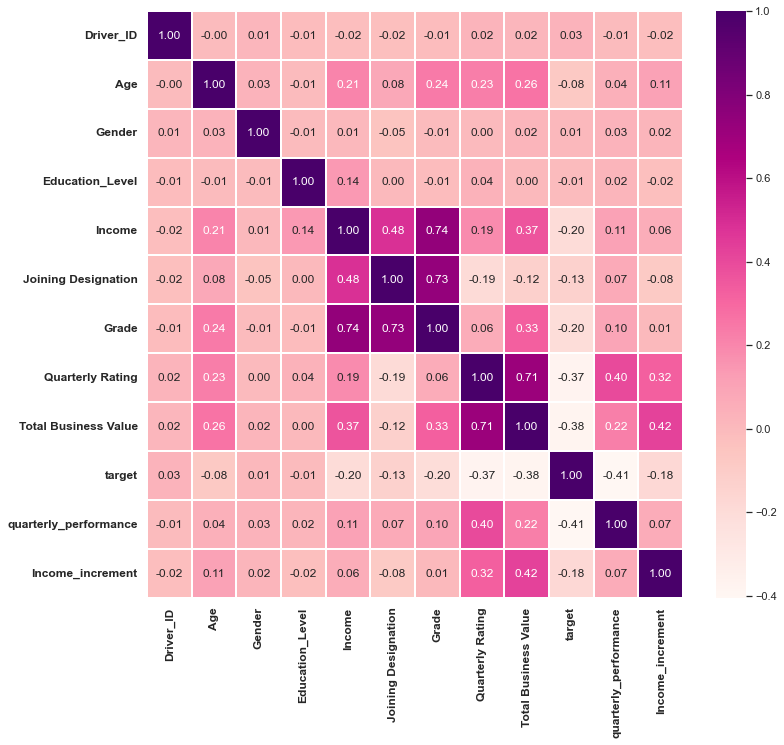

In [63]:
# Checking correlation among independent variables and how they interact with each other.

fig, ax = plt.subplots(figsize=(12, 10))
fig.subplots_adjust(top=.94)

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

sns.heatmap(company_data_final.corr(), annot = True, fmt='.2f', linewidths=.3, ax = ax ,cmap='RdPu')
plt.show()

**Insights-**
*   Quarterly Rating is higly corelated with Total Business Value (0.71)
*   Joining Designation is higly corelated with Grade (0.73)
*   Income is higly corelated with Grade (0.74)
*   Joining Designation is moderately corelated with Income (0.48)
*   Income_increment is moderately corelated with Quarterly Rating (0.32)
*   quarterly_performance is very weakly correlated with target (-0.41)
*   Total Business Value is very weakly correlated with target (-0.38)

In [64]:
company_data_final

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.000000,1715580,1,0,0
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.000000,0,0,0,0
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.000000,350000,1,0,0
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.000000,120360,1,0,0
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,2020-10-28,1,1,1.000000,0,1,0,0
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,2019-09-22,2,2,1.666667,2815090,1,0,0
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,2019-06-20,1,1,1.500000,977830,1,0,0


In [65]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [66]:
numerical_cols = ['Total Business Value', 'Income', 'Age']

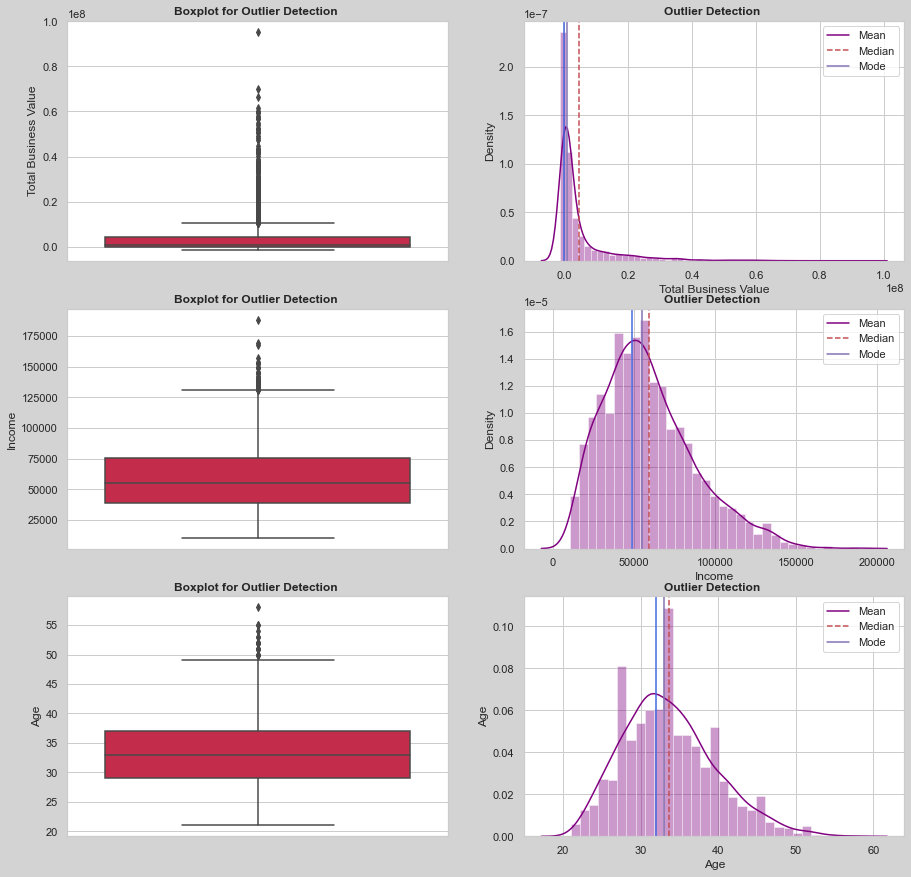

In [67]:
numerical_feat(company_data_final,numerical_cols,len(numerical_cols),2,15,15)

**Insights -**
*   We can see tons of outliers in Total Business Value.Also, it's distribution is left skewed, which tells that a minority chunk of employees contributes to vast business value aquired by employees.
*   However, Income and Age are more or less normally distributed with minimum outliers.

In [68]:
# Frequency of each feature in percentage.
def categorical_feat(df, colnames, nrows=2,mcols=2,width=15,height=70, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("flare"),ax=ax[rows][0])
        ax[rows][0].tick_params(axis='x', rotation=30)
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)
        
        count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True, ax=ax[rows][1])#explode=[0.2 if colname[i] == min(colname) else 0])        
        ax[rows][0].set_title("Frequency wise " + colname, fontweight="bold")
        string = "Frequency of "
        rows += 1 

In [69]:
categorical_cols = ['Education_Level', 'Joining Designation', 'Grade', 'target', 'quarterly_performance','Income_increment','Age Groups','Gender','Income Groups','City']

In [70]:
for i in categorical_cols:
    print(f" Unique values in {i} are {company_data_2[i].nunique()}")

 Unique values in Education_Level are 3
 Unique values in Joining Designation are 5
 Unique values in Grade are 5
 Unique values in target are 2
 Unique values in quarterly_performance are 2
 Unique values in Income_increment are 2
 Unique values in Age Groups are 5
 Unique values in Gender are 2
 Unique values in Income Groups are 5
 Unique values in City are 29


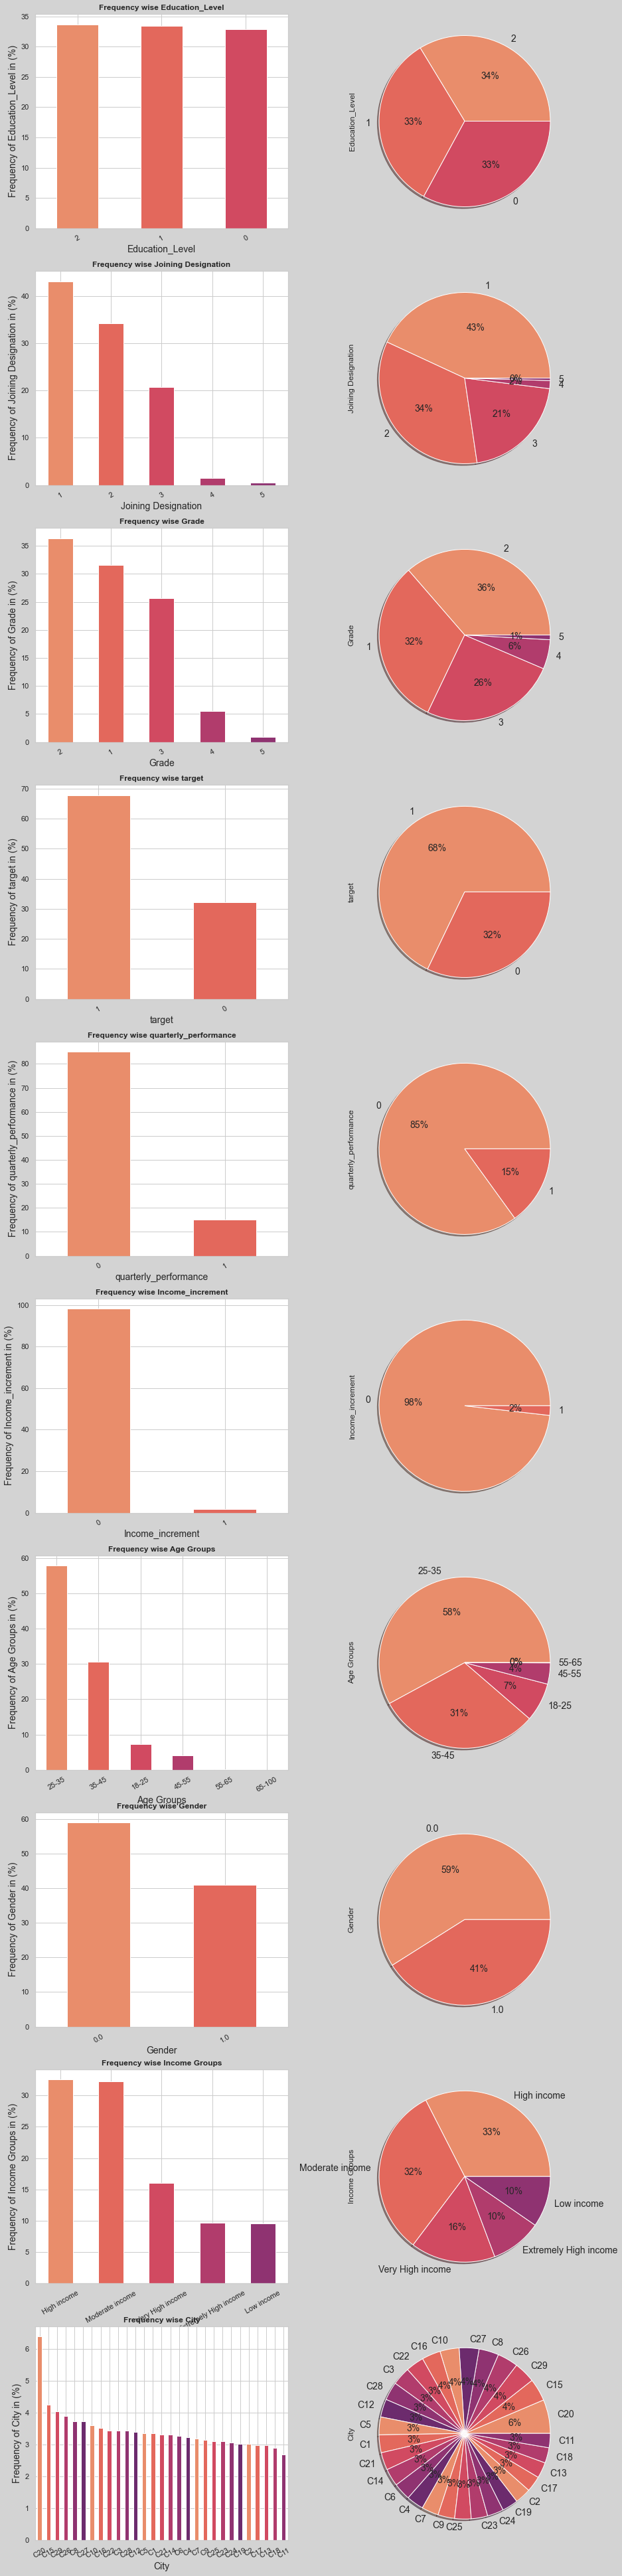

In [71]:
categorical_feat(company_data_2,categorical_cols,len(categorical_cols),2)

**Insights -**
*   The education level is in same ratio for 0, 1 and 2 levels
*   Joining desination and Grade shows nearly similar behaiviour.
*   For 32% of the employees, we have the last working day not present whereas as 68% of them will be leaving the insurance company soon as they have reported their last working day.
*   15% of employees saw quarterly performance increase in their ratings.
*   The employees with the code 1 are 41% whereas employees with the code 0 dominates the population with 59%.
*   City code with C20 has highest no.of employees
*   Majority number of employees are from high to moderate Income groups.
*   Most of the employees are from 25 to 35 age groups.
*   In these two years with the code 0 and 1, only 2% of them have got some amount of increment in their Income.





**Datetime feature creation for model training:**
*   Dropping the rows for datetime object and converting them to ordered **year, month and day of the week** to fetch some **meaningful numerical input** for model training.

In [72]:
#1
company_data_final['reporting_year'] = company_data_final['MMM-YY'].dt.year
#2
company_data_final['reporting_month'] = company_data_final['MMM-YY'].dt.month
#3
company_data_final['reporting_day_of_week'] = company_data_final['MMM-YY'].dt.day_of_week
#1
company_data_final['joining_year'] = company_data_final['Dateofjoining'].dt.year
#2
company_data_final['joining_month'] = company_data_final['Dateofjoining'].dt.month
#3
company_data_final['joining_day_of_week'] = company_data_final['Dateofjoining'].dt.day_of_week


In [73]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [74]:
# dropping unwanted features

company_data_final.drop(['Driver_ID','MMM-YY', 'Dateofjoining', 'LastWorkingDate'], axis=1, inplace=True)

In [74]:
# Checking for feature with non-numerical values:
from pandas.api.types import is_numeric_dtype
company_col = list(company_data_final.columns)
for col in company_col:
    if is_numeric_dtype(company_data_final[col])== False:
        print(col)

City
Gender
Education_Level


In [75]:
company_data_final['Gender'].value_counts()

0.0    1400
1.0     975
nan       6
Name: Gender, dtype: int64

In [76]:
company_data_final['Gender'] = company_data_final['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [77]:
company_data_final['Gender'].value_counts()

1    2381
Name: Gender, dtype: int64

In [78]:
company_data_final['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

**Note: We will do target encoding for City after train-test split.**

In [79]:
company_data_final

,Age,City,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Income_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
0,28.0,C23,1,2,57387,1,1,2.000000,1715580,1,0,0,2019,1,1,2018,12,0
1,31.0,C7,1,2,67016,2,2,1.000000,0,0,0,0,2020,11,6,2020,11,4
2,43.0,C13,1,2,65603,2,2,1.000000,350000,1,0,0,2019,12,6,2019,12,5
3,29.0,C9,1,0,46368,1,1,1.000000,120360,1,0,0,2019,1,1,2019,1,2
4,31.0,C11,1,1,78728,3,3,1.600000,1265000,0,1,0,2020,8,5,2020,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,C24,1,0,82815,2,3,2.625000,21748820,0,1,0,2019,1,1,2015,10,3
2377,34.0,C9,1,0,12105,1,1,1.000000,0,1,0,0,2020,8,5,2020,8,4
2378,45.0,C19,1,0,35370,2,2,1.666667,2815090,1,0,0,2019,1,1,2018,7,1
2379,28.0,C20,1,2,69498,1,1,1.500000,977830,1,0,0,2019,1,1,2018,7,5


In [80]:
# target -> 1:known LWD 0: Unknown LWD

company_data_final["target"].value_counts(normalize = True)

1    0.678706
0    0.321294
Name: target, dtype: float64

In [81]:
# Assigning the featurs as X and target as y
# target -> 1:known LWD 0: Unknown LWD

X= company_data_final.drop(["target"],axis =1)
y= company_data_final["target"]

**Splitting data into train , validation and test**

In [82]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [83]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_CV dataset: ", X_val.shape)
print("Number transactions y_CV dataset: ", y_val.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1523, 17)
Number transactions y_train dataset:  (1523,)
Number transactions X_CV dataset:  (381, 17)
Number transactions y_CV dataset:  (381,)
Number transactions X_test dataset:  (477, 17)
Number transactions y_test dataset:  (477,)


In [84]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
X_train['City'] = encoder.fit_transform(X_train['City'], y_train)

In [85]:
#Converting city from category to numerical via target encoding for cv data:

X_val['City'] = encoder.transform(X_val['City'], y_val)

In [86]:
#Converting city from category to numerical via target encoding for cv data:

X_val['City'] = encoder.transform(X_val['City'], y_val)

**We have used target encoding for City and used the encoder object to fit_transform which fits the encoders on train set and then transforms as well but transform only transforms the encoders learnt from train set onto test and val sets.**

In [87]:
X_train

,Age,City,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,quarterly_performance,Income_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
160,34.0,0.671875,1,1,20922,2,2,1.000000,151600,0,0,2019,11,4,2019,11,5
1643,37.0,0.491803,1,1,67317,1,2,1.000000,1061950,0,0,2019,1,1,2016,11,0
1159,43.0,0.642857,1,1,87325,3,3,1.000000,566440,0,0,2020,4,2,2020,4,5
499,30.0,0.611111,1,2,70570,1,2,1.428571,1583300,0,0,2019,1,1,2017,6,4
1214,33.0,0.680851,1,1,70900,1,1,1.500000,1741830,0,0,2019,1,1,2018,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.632653,1,0,82815,2,3,2.625000,21748820,1,0,2019,1,1,2015,10,3
652,37.0,0.671875,1,1,18285,1,1,1.000000,386590,0,0,2019,1,1,2018,11,4
1943,27.0,0.500000,1,2,83632,2,2,2.000000,371110,0,0,2020,11,6,2020,11,5
1066,38.0,0.693878,1,1,130277,3,3,1.000000,988020,0,0,2019,7,0,2019,7,3


# Model 1 - Decision Trees

**Simple Decision Tree Implementation:**
*   Using f1_score as the data is imbalanced
* Hyper-parameter tuning with max_depth and class_weight

In [88]:
# Hyper-pram tuning + DT model
# target(1) -> 1:known LWD (0.68)
# target(0) -> 0:Unknown LWD (0.32)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=2.32

for depth in np.arange(l,u,d):
    clf = DecisionTreeClassifier(random_state=0, max_depth=depth, class_weight={ 0:0.68, 1:w } )
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    val_y_pred = clf.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

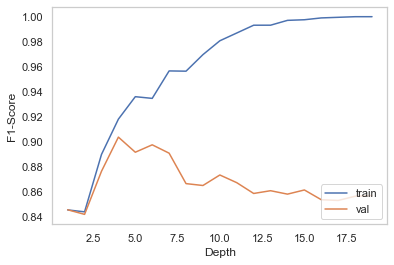

In [89]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [90]:
best_idx = np.argmax(val_scores)
best_idx

3

In [91]:
val_scores

[0.8457711442786069,
 0.8421052631578947,
 0.8765217391304349,
 0.9038112522686025,
 0.8917431192660551,
 0.8976660682226212,
 0.8909774436090225,
 0.8666666666666667,
 0.8651685393258427,
 0.8735632183908046,
 0.8674242424242424,
 0.8588007736943907,
 0.8610038610038611,
 0.8582677165354332,
 0.8615984405458089,
 0.8538011695906433,
 0.853228962818004,
 0.856581532416503,
 0.8571428571428573]

In [92]:
l+d*best_idx

4

In [93]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
print(l_best)
clf = DecisionTreeClassifier(random_state=0, max_depth=l_best, class_weight={ 0:0.68, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

4
0.9038112522686025


array([[ 79,  37],
       [ 16, 249]], dtype=int64)

In [94]:
test_score = clf.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'C5'

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the insurance company  100  -TN           50   -FP
# leaving the insurance company      17   -FN           310  -TP
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

In [ ]:
# AUC- ROC

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

In [ ]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights from Model 1:**
*  Observations from Model 1:
*  The depth best = 4 and class_weght ratio 0 == 0.68 and 1 == 2.32 .Even on more depth it's giving same performace but the diff between train and cv predictions is high and hence we will prefer depth == 4.
*  The f1 score for predicting leaving the insurance company is 0.90
*  The recall score for predicting leaving the insurance company is 0.94
*  The precision score for predicting leaving the insurance company is 0.85
*  The AUC score for predicting leaving the insurance company is 0.89
*  The most important features according to model 1 are :
*  reporting_year,Total Business Value,reporting_month,quarterly_performance
*  Education_Level and Age are have comparatively less/ negligible importance.
*  All the other features can be neglected completly.

# Model 2 - Decision Trees (GridSearchCV)

**Another approach for Decision trees implementaion:**
* Using k-fold CV and Grid Search

In [95]:
# Simple DT
# 5-fold CV
# Grid Search for best hyper-param
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7, 9],
    "max_leaf_nodes" : [15, 20, 25, 30]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "f1", cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_leaf_nodes': [15, 20, 25, 30]},
             scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

In [ ]:
print(clf.best_estimator_)

In [ ]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):

    train_sizes, train_scores, test_scores,fit_times,score_times= learning_curve(estimator,X,y,return_times=True)

    fig, axes = plt.subplots(1, 1, figsize = (10, 5))

    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
    )
    axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
    )
    axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    plt.show()

In [ ]:
model_kcv = clf.best_estimator_

model_kcv.fit(X_train, y_train)

plot_learning_curve(model_kcv, X_train, y_train, "Decision Trees")

print(model_kcv.score(X_train, y_train))

# more data could help as CV-score is improving as datset size increases.

In [ ]:
# plot the decision tree
from sklearn import tree

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model_kcv, fontsize=10)
plt.show()

In [ ]:
#Testing on test data

test_score = model_kcv.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = model_kcv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

In [ ]:
# AUC- ROC

y_pred_proba = model_kcv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()

In [ ]:
# Feature importance
importances = model_kcv.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Observations from Model 2:**
* The max_depth=7, max_leaf_nodes=20 .Even on more depth it's giving same performace and hence we will prefer most optimal hyperparams
* The f1 score for predicting leaving the insurance company is 0.92
* The recall score for predicting leaving the insurance company is 0.91
* The precision score for predicting leaving the insurance company is 0.93
* The AUC score for predicting leaving the insurance company is 0.91
* The most important features according to model 1 are :
  * Total Business Value,reporting_year,reporting_month,quarterly_performance
  * Salary ,joining_month and Age are have comparatively less/ negligible importance.
  * All the other features can be neglected completly.
* As compared to previous Model 1, we are getting more better scores* .

# Model 3 - Random Forest:

**Using example of an ensemble learning algorithm called bagging.**
* We will use the Random Forest model which uses Bagging, where decision tree models with higher variance are present.
* Using f1_score as the data is imbalanced
* Hyper-parameter tuning with max_depth , class_weight, max_samples, num of learners.

In [ ]:
# Hyper-pram tuning + DT model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=2.32
num_learners=100
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
    clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate,\
                                 n_estimators=num_learners, random_state=42, oob_score=True, class_weight={ 0:0.68, 1:w } )
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    val_y_pred = clf.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
print(f"l_best:{l_best}")
clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate,\
                             n_estimators=num_learners, random_state=42, class_weight={ 0:0.68, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(f"val_score:{val_score}")

confusion_matrix(y_val, y_pred_val)

In [ ]:
#Testing on test data

test_score = clf.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the insurance company  95  -TN           55   -FP
# leaving the insurance company      7   -FN           320  -TP

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

In [ ]:
# AUC- ROC

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

In [96]:
X_train.columns

Index(['Age', 'City', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Quarterly Rating',
       'Total Business Value', 'quarterly_performance', 'Income_increment',
       'reporting_year', 'reporting_month', 'reporting_day_of_week',
       'joining_year', 'joining_month', 'joining_day_of_week'],
      dtype='object')

In [97]:
# Feature importance

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

**Insights from Model 3:
* The max_depth=7, max_leaf_nodes=20 .Even on more depth it's giving same performace and hence we will prefer most optimal hyperparams
* The f1 score for predicting leaving the insurance company is 0.91
* The recall score for predicting leaving the insurance company is 0.98
* The precision score for predicting leaving the insurance company is 0.85
* The AUC score for predicting leaving the insurance company is 0.93
* The most important features according to model 1 are :
  * Total BusinessValue,quarterly_performance,reporting_month,QuarterlyRating,joining_year,reporting_year,,
  * Salary ,joining_month ,City,and Age are have comparatively less/ negligible importance.
  * All the other features can be neglected completly.
* As compared to previous Model 1 and 2, we are getting comparatively better scores.
* Here using Bagging we tried to solve over-fitting problem while we will use Boosting which will be used to reduce bias.

# Model 4 - XgBoost:

**Using example of an ensemble learning algorithm called boosting.**
* Boosting
* We will use Boosting technique called XgBoost model which implements machine learning algorithms under the Gradient Boosting framework.
* Using f1_score as the data is imbalanced.
* Using n_jobs as 4 emaning no. of jobs running parallely on 4 cores.
* Hyper-parameter tuning with max_depth , learning_rate, subsample, colsample_bytree , n_estimators, and n_iter
* Using StratifiedKFold and RandomizedSearchCV

In [ ]:
# Xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier( n_estimators=100, objective='multi:softmax', num_class=20, silent=True)

In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='f1',\
                                   n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20,\
                         subsample=0.7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, y_train)

In [ ]:
print(f"Time taken for training :\
{end - start}\nTraining accuracy:{best_xgb.score(X_train, y_train)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")

In [ ]:
#Testing on test data

test_score = best_xgb.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

**AUC - ROC using softprob:**
* Using objective='multi:softprob' instead of objective='multi:softmax'

In [ ]:
best_xgb_softprob = XGBClassifier(n_estimators=100, objective='multi:softprob', num_class=20,\
                         subsample=0.7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb_softprob.fit(X_train, y_train)

In [ ]:
# AUC- ROC

y_pred_proba = best_xgb_softprob.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

In [ ]:
# Feature importance

importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights from Model 4:**
* The best hyperparameters combinations are : 'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.1,'colsample_bytree': 1.0.
* The f1 score for predicting leaving the insurance company is 0.93
* The recall score for predicting leaving the insurance company is 0.93
* The precision score for predicting leaving the insurance company is 0.92
* The AUC score for predicting leaving the insurance company is 0.94
* The most important features according to model 4 are :
    * quarterly_performance,reporting_year,reporting_month,joining_year,Total BusinessValue
    * Quarterly Rating,Salary ,joining_month ,City,and Age are have comparatively less/ negligible importance.
    * All the other features can be neglected completly.
* As compared to previous three models, we are getting best scores.

# Model 5 - Standalone Random Forest With XGBoost API

In [100]:
from xgboost import XGBRFRegressor,XGBRFClassifier
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold,cross_val_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)
train_y_pred = model.predict(X_train)
val_y_pred = model.predict(X_val)
train_score = f1_score(y_train, train_y_pred)
val_score = f1_score(y_val, val_y_pred)
train_score,val_score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# best_idx = np.argmax(val_scores1)
# l_best = l+d*best_idx
# print(f"l_best:{l_best}")

model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(f"val_score:{val_score}")

confusion_matrix(y_val, y_pred_val)

In [ ]:
#Testing on test data

test_score = model.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the insurance company  122  -TN           28   -FP
# leaving the insurance company      23   -FN           304  -TP

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

In [ ]:
# AUC- ROC

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

In [ ]:
# Feature importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

# Caveats:
* XGBoost uses 2nd order approximation to the objective function. This can lead to results that differ from a random forest implementation that uses the exact value of the objective function.


* XGBoost does not perform replacement when subsampling training cases. Each training case can occur in a subsampled set either 0 or 1 time.


* Still, most of the regularization parameters of XGBoost tend to favour simple trees, while the idea of a random forest is to aggregate deep, overfitted trees. These regularization parameters have to be changed as well in order to get good results.


* While XGBoost does not offer such sampling with replacement, we can still introduce the necessary randomness in the dataset used to fit a tree by skipping 37% of the rows per tree. Column subsampling per split is the main source of randomness in a random forest. A good default is usually to sample the square root of the number of features m or m/3.

**Insights from Model 5-**
* The f1 score for predicting leaving the insurance company is 0.92
* The recall score for predicting leaving the insurance company is 0.93
* The precision score for predicting leaving the insurance company is 0.92
* The AUC score for predicting leaving the insurance company is 0.94
* The most important features according to model 5 are :
    * quarterly_performance,reporting_year,reporting_month,joining_year,Total BusinessValue
    * Quarterly Rating,Salary_increment ,joining_month ,Designation are have comparatively less/ negligible importance.
    * All the other features can be neglected completly.
* As compared to first three models, we are getting best scores., whereas, compared to Model 4 (Xgboost) we are getting almost similar scores but there's a change in the feature importances.

# Actionable Insights & Recommendations:

* The model performance comparisons are as follows :
    * Model 5 (Random Forest + XgBoost ) ~ Model 4 ( XgBoost ) > Model 2 (Decision Trees with k-fold CV and gridsearch) > Model 3 (Random Forest > Model 1 (Decision Trees).


* Total BusinessValue is one of the most important feature in predicting if a employee is going to leave the company or not.As the total business value acquired by the employee in a month is helping the company in generating revenue and it's obvious that it is highly correlated with the quarterly_performance (quarterly rating) which is also an important feature.Hence, the company should focus on such top performers and should give some kind of felicitation/awards to keep the morale high of employees. Also for those, whose ratings are not good, the company should conduct bimonthly meets (online/offline) to educate employees about ethical/moral lessons so that the customers wouldn't give them bad ratings as negative business indicates in cancellation/refund or car EMI adjustments which is hampering the company in long run.


* reporting_year , joining_year, and reporting_month also are important features in chrning predictions as it can tell very clearly in how much time in general, a employee is leaving the company. Also, if the employees are not regular in reporting their updates/status , it's clear indication that they are not interested in staying. The company should identify such employees should aks them about the such irregularities reasons and thus can focus on undersatnding their problems and should resolve their queries as much as possible.


* Feature Salary_increment stands out with Model 5 as one of the decent features. As it's eveident from the EDA, In these two years 2019 and 2020, only 2% of the employees have got some amount of increment in their Salary. Which means, if the employees are not satisfied with their progress or they are not getting the expected outcome and hence they are looking out for some other options (another company). So the company should focus on covering the employees basic necessities such as insurance policies, health checkups, permanent emplyoment status, etc which will avoid the employees in recognising themselves as part of finacially unreliable gig economy and also will loosen some financial burden which inturn would motivates them to stay with insurance company for long time.